# Cosine Similarity vs. L2 Distance
You need `data/features/{split}.pkl` file in place. This notebook reads it and calculates the features. You can generate them using `linking.ipynb` file (execute until and including feature generation).

# Vector Distance L2 Norm

In [3]:
import logging
import pickle
from tqdm.notebook import  tqdm
import importlib
import unsupervised.raw_text_driver
importlib.reload(unsupervised.raw_text_driver)
import unsupervised.portal_dnb_driver
importlib.reload(unsupervised.portal_dnb_driver)
import unsupervised.data_loader
with open(f"data/features/train.pkl", "rb") as f:
    list_of_good_entities = pickle.load(f)

importlib.reload(unsupervised.data_loader)


data_loader = unsupervised.data_loader.DataLoader(raw_data_path='/home/aheser/ETH-CS4NLP-22-Project-Linking-GND/data/input/raw')

Available models: ['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
logging.basicConfig(level=logging.WARNING)
for split in ["train", "eval", "test"]:
    print('processing', split)
    with open(f"data/features/{split}.pkl", "rb") as f:
        list_of_good_entities = pickle.load(f)
    
    for current_entity in tqdm(list_of_good_entities):
        distances = data_loader.get_context_distances(current_entity, similarity_measure='l2', window_size=10)
    #     print(distances)
        for feature_counter in range(len(current_entity['features'])):
            current_entity['features'][feature_counter].extend(distances[feature_counter])
    
    with open(f"data/features/experiment_unsupervised_{split}.pkl", "wb") as f:
        pickle.dump(list_of_good_entities, file=f)

processing train


  0%|          | 0/561 [00:00<?, ?it/s]

processing eval


  0%|          | 0/49 [00:00<?, ?it/s]

processing test


  0%|          | 0/202 [00:00<?, ?it/s]

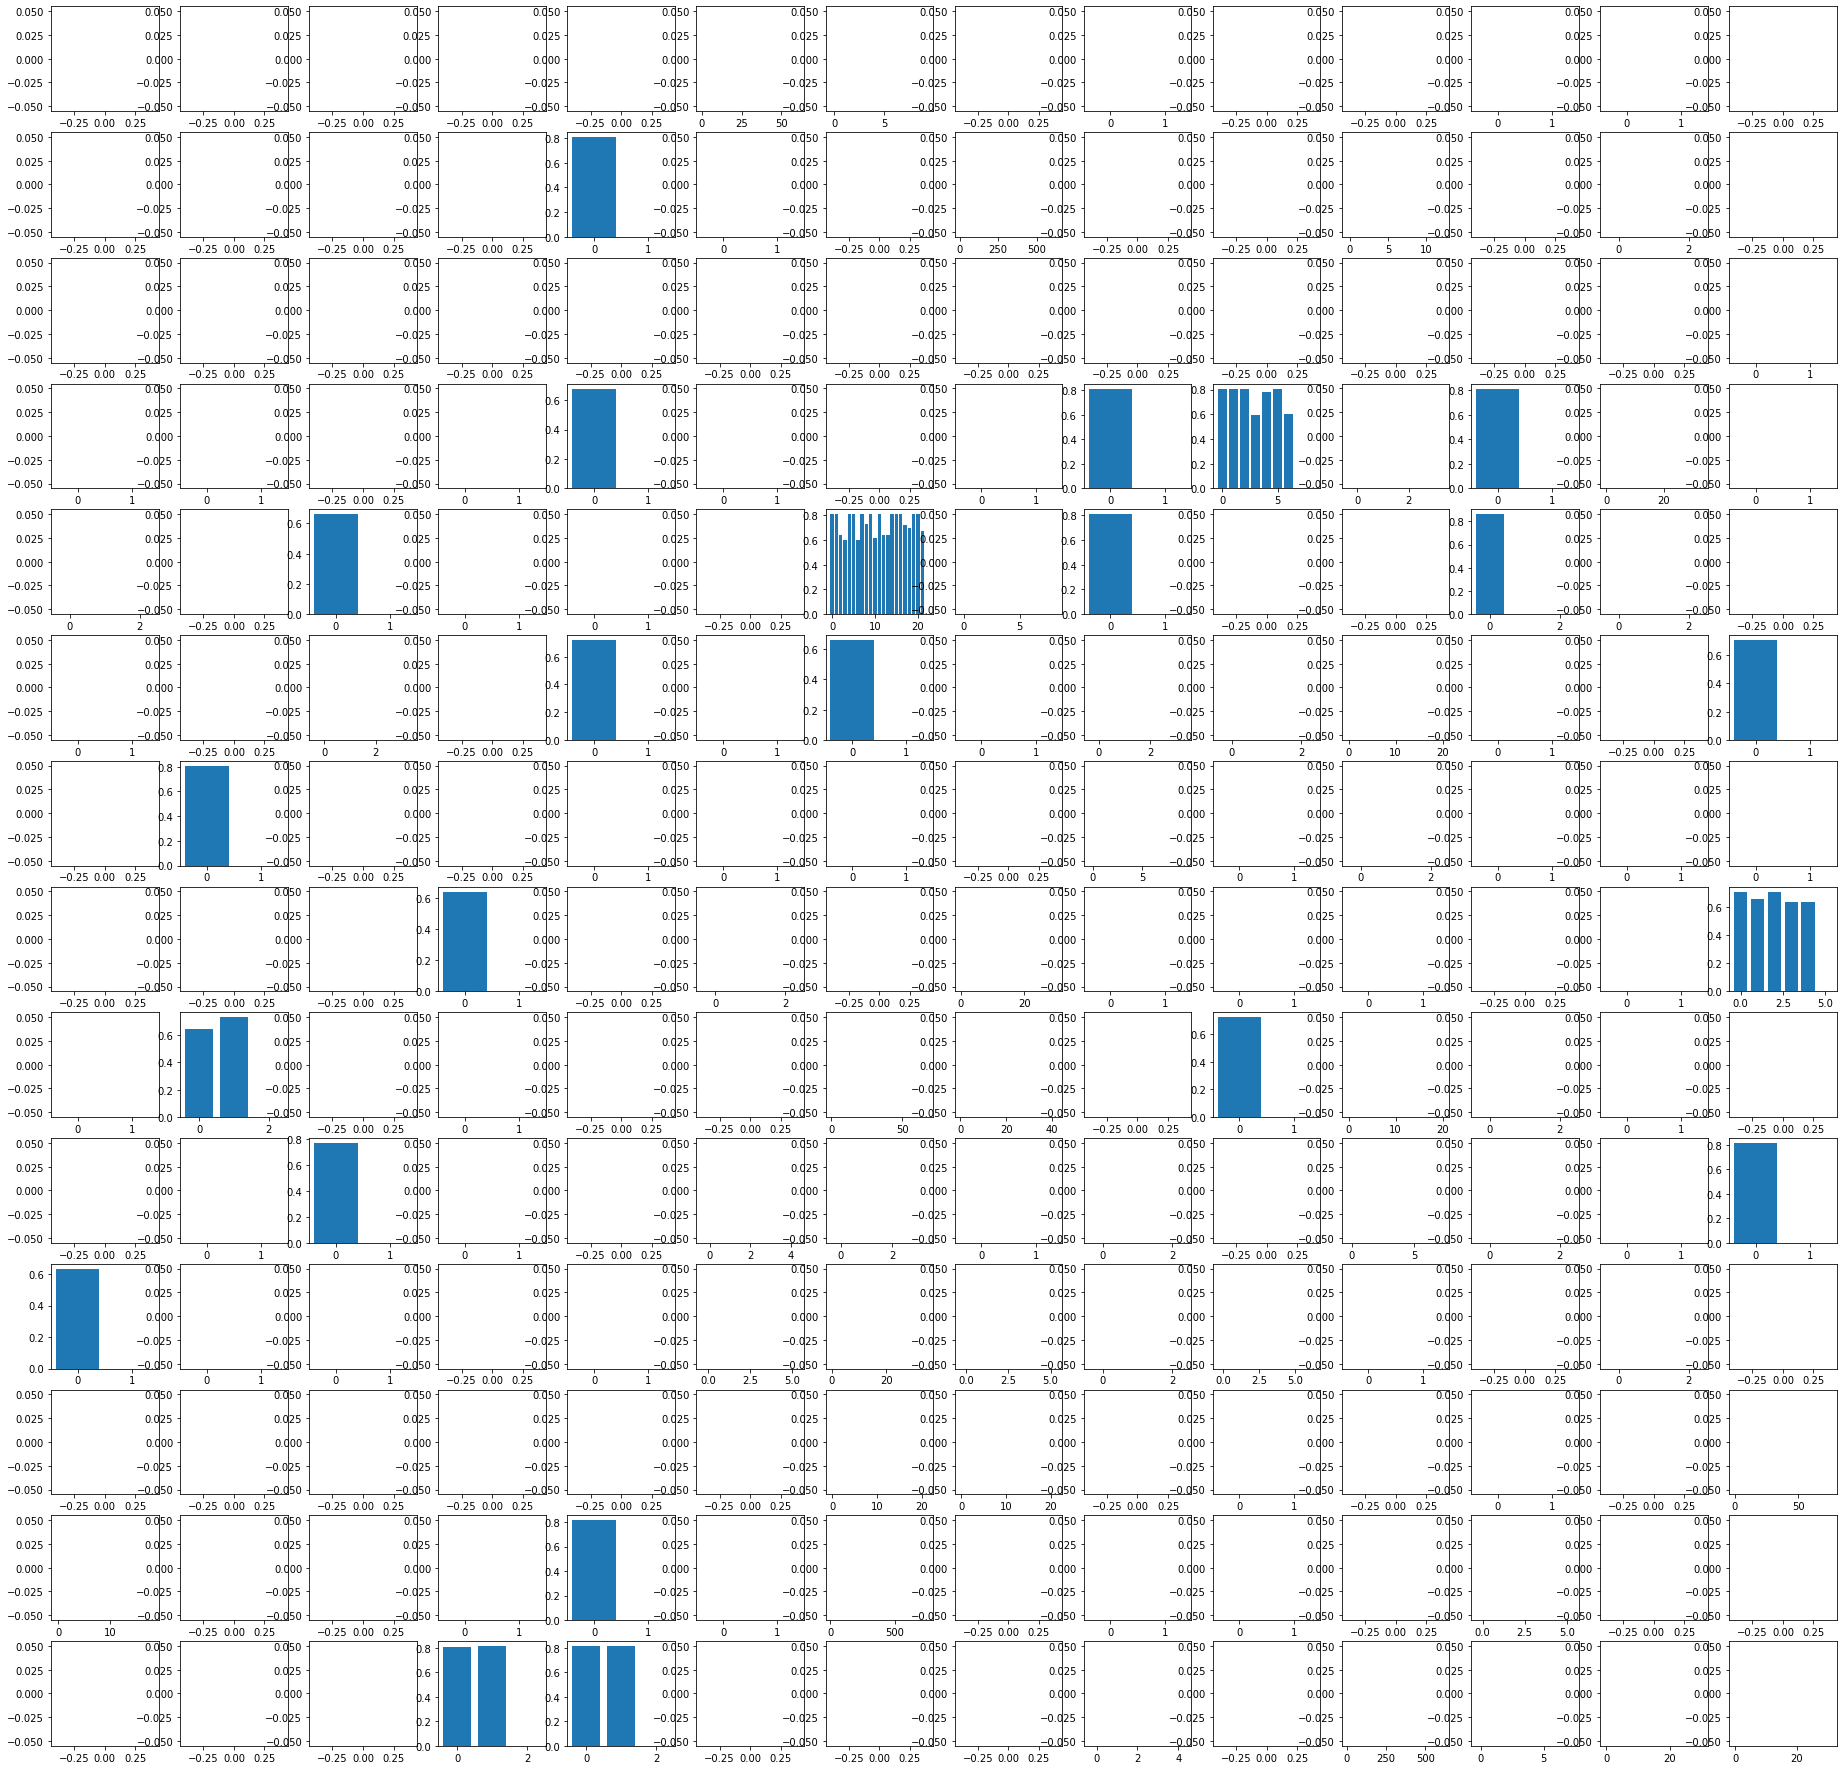

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.WARNING)

split = 'train'
with open(f"data/features/experiment_unsupervised_{split}.pkl", "rb") as f:
    list_of_good_entities = pickle.load(file=f)

row = 14
fig, ax = plt.subplots(row, row, figsize=(32, 32))
for counter_x in range(row):
    for counter_y in range(row):
        x = [y[-3:] for y in list_of_good_entities[counter_x*row + counter_y]['features']]
        z = np.array([y[0] for y in x])
        z[z > 100] = 0
        ax[counter_x, counter_y].bar(range(len(z)), z)

# Cosine similarity

In [13]:
logging.basicConfig(level=logging.WARNING)
for split in ["train", "eval", "test"]:
    print('processing', split)
    with open(f"data/features/{split}.pkl", "rb") as f:
        list_of_good_entities = pickle.load(f)
    
    for current_entity in tqdm(list_of_good_entities):
        distances = data_loader.get_context_distances(current_entity, similarity_measure='cosine_similarity', window_size=10)
    #     print(distances)
        for feature_counter in range(len(current_entity['features'])):
            current_entity['features'][feature_counter].extend(distances[feature_counter])
    
    with open(f"data/features/cosine_experiment_unsupervised_{split}.pkl", "wb") as f:
        pickle.dump(list_of_good_entities, file=f)

processing train


  0%|          | 0/561 [00:00<?, ?it/s]

/home/aheser/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


processing eval


  0%|          | 0/49 [00:00<?, ?it/s]

processing test


  0%|          | 0/202 [00:00<?, ?it/s]

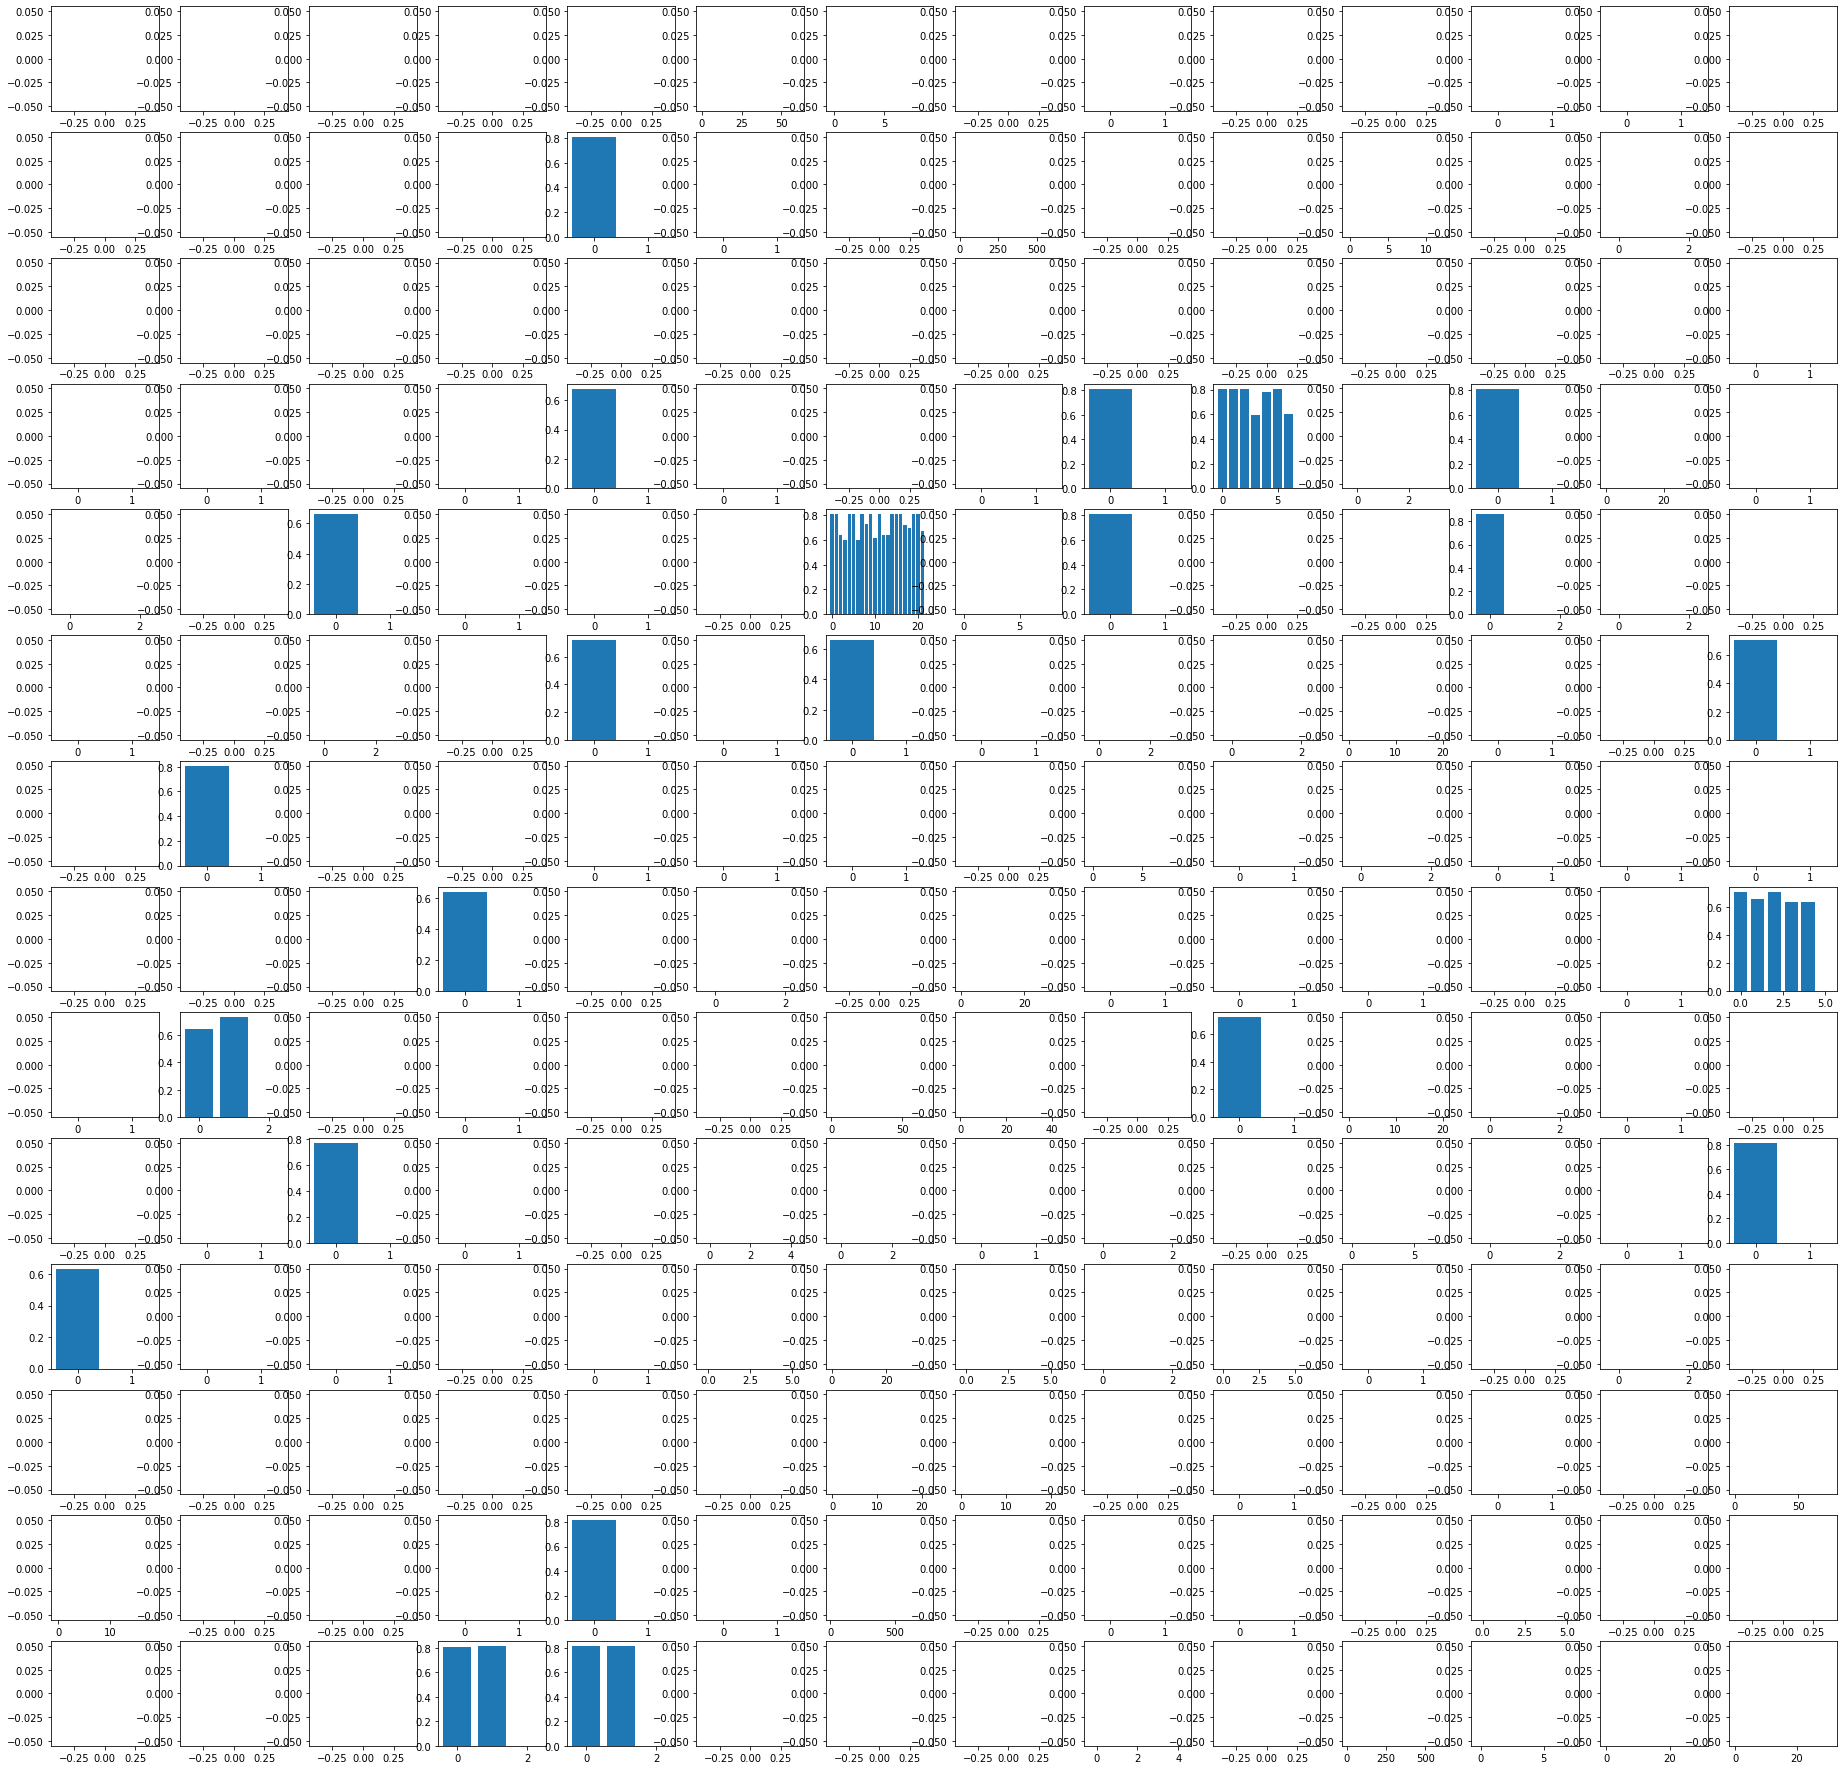

In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.WARNING)

split = 'train'
with open(f"data/features/cosine_experiment_unsupervised_{split}.pkl", "rb") as f:
    list_of_good_entities = pickle.load(file=f)

row = 14
fig, ax = plt.subplots(row, row, figsize=(32, 32))
for counter_x in range(row):
    for counter_y in range(row):
        x = [y[-3:] for y in list_of_good_entities[counter_x*row + counter_y]['features']]
        z = np.array([y[0] for y in x])
        z[z > 100] = 0
#         print(len(z))
        ax[counter_x, counter_y].bar(range(len(z)), z)